# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Dilation, Erosion and Edge Detection</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Dilation <br>
2️⃣ Erosion <br>
3️⃣ Opening <br>
4️⃣ Closing <br>
5️⃣ Canny Edge Detection
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **1. Dilation** - Adds pixels to the boundaries of objects in an image ###
### **2. Erosion** - Removes pixels at the boundaries of objects in an image ###
### **3. Opening** - Erosion followed by dilation ###
### **4. Closing** - Dilation followed by erosion ###

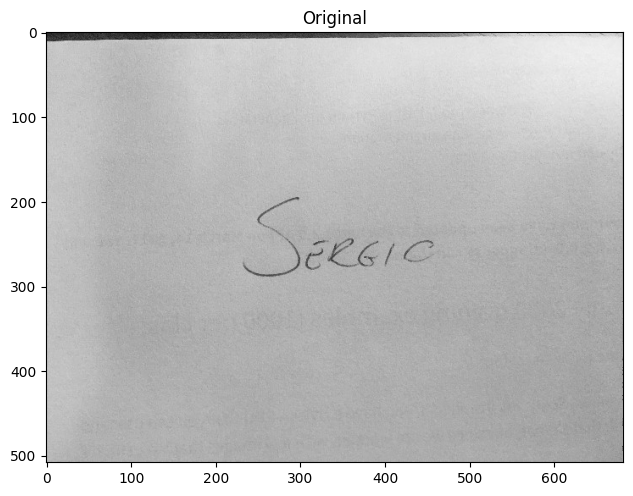

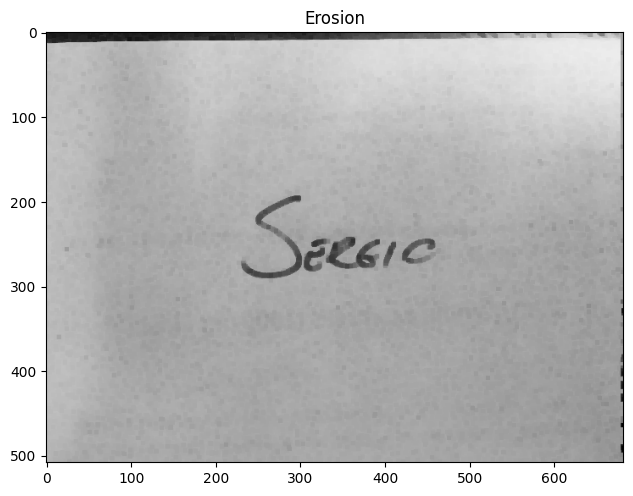

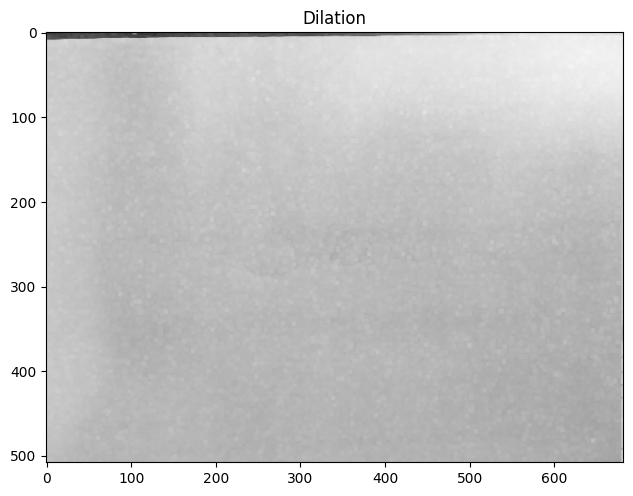

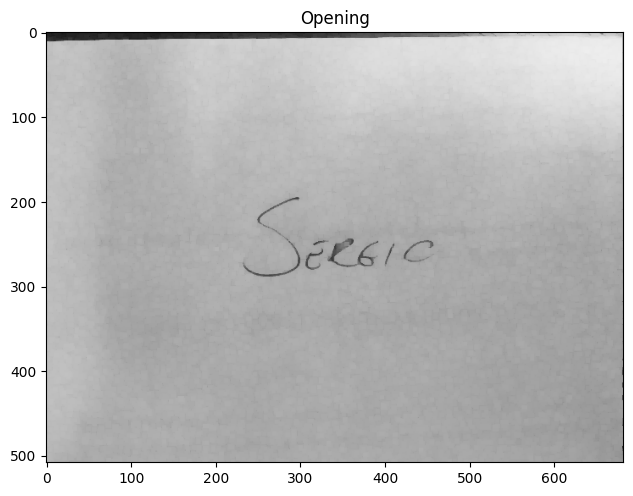

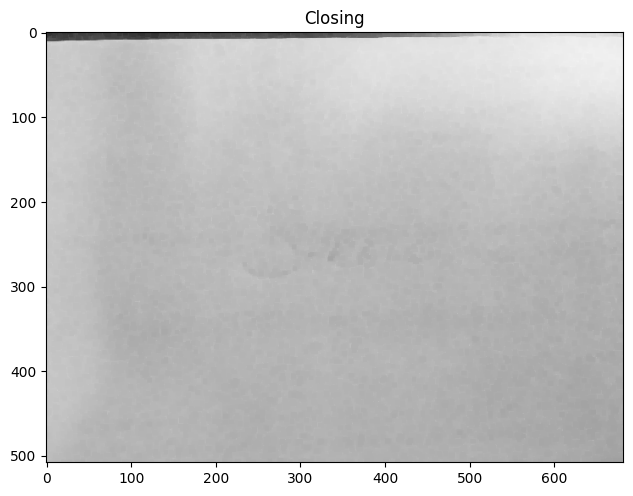

In [5]:
import cv2
import numpy as np

image = cv2.imread("images/word.jpg", 0)
imshow("Original", image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening', opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing', closing)

### **Canny Edge Detection** ###

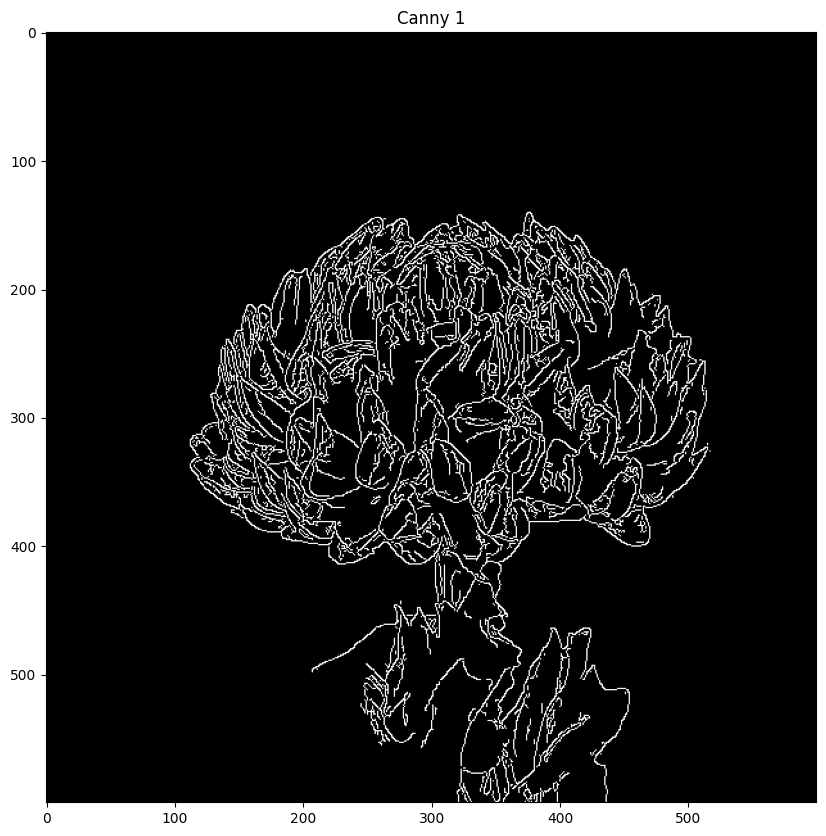

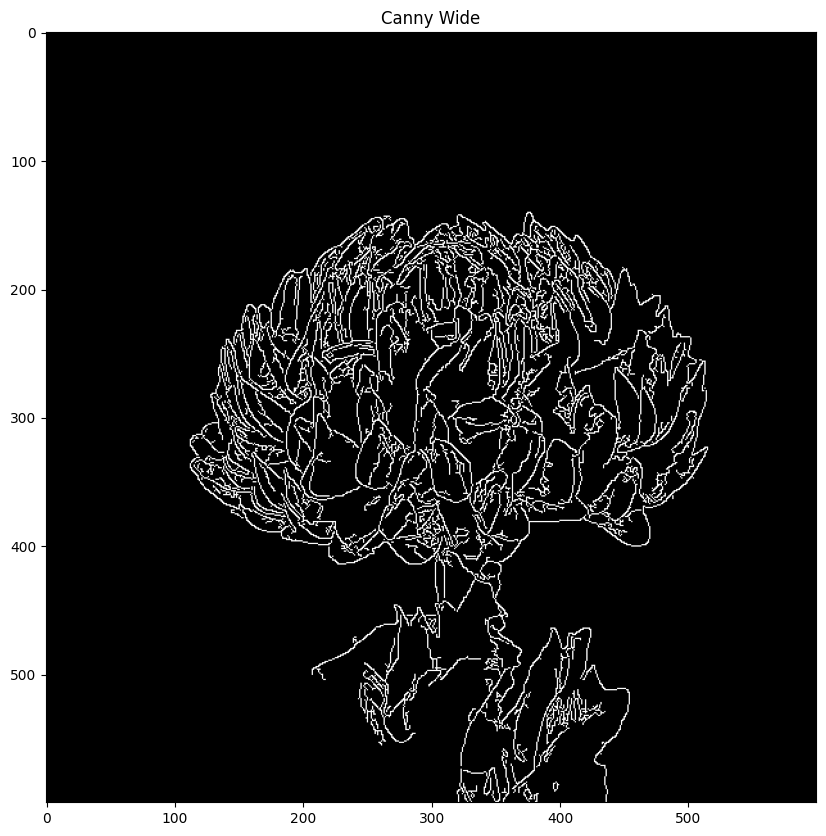

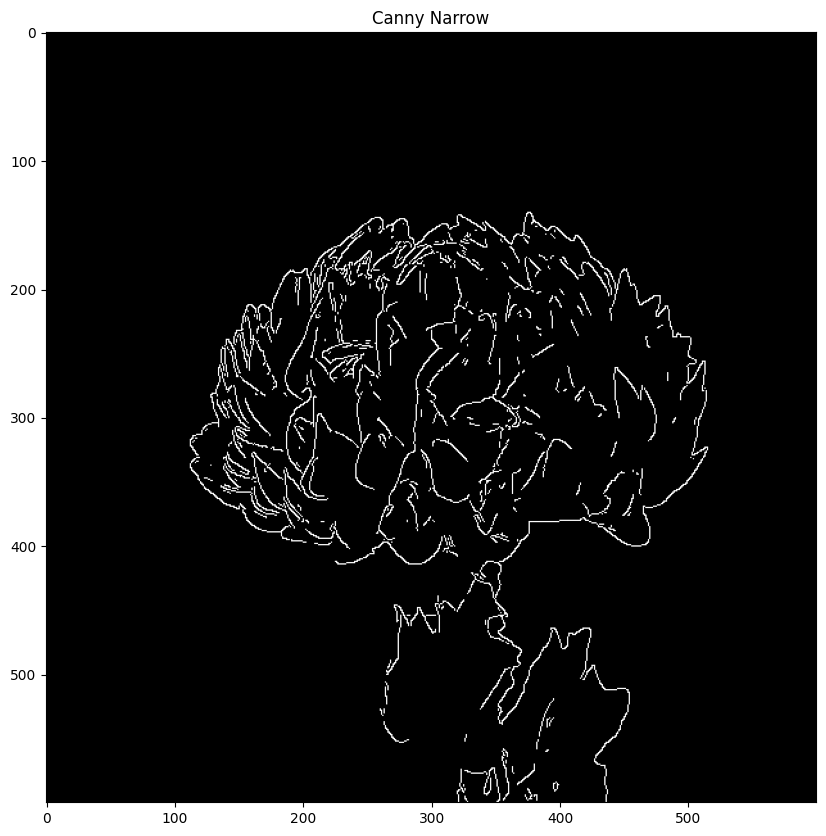

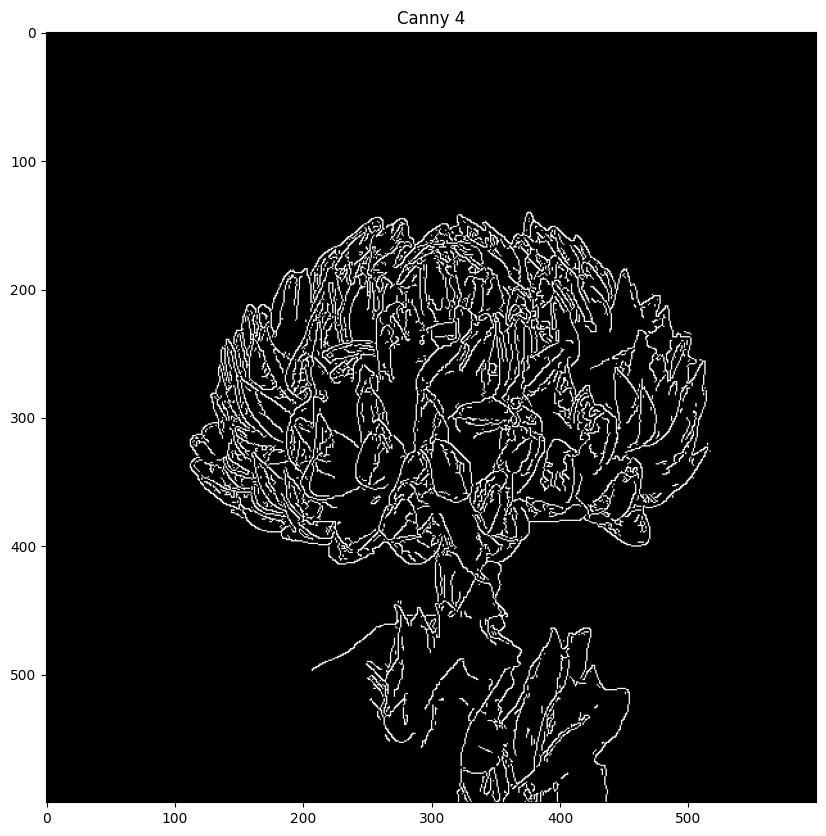

In [ ]:
image = cv2.imread('images/flowers.jpg', 0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)  # minVal, maxVal
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)  # minVal, maxVal
imshow('Canny Wide', canny)

# Narrow edge thresholds expect lots of edges
canny = cv2.Canny(image, 200, 240)  # minVal, maxVal
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)  # minVal, maxVal
imshow('Canny 4', canny)

# Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge.
# Values in between threshold1 and threshold2 are either classified as edges or non-edges based on how their
# intensities are "connected". In this case, any gradient values below 60 are considered non-edges
# whereas any values above 120 are considered edges.   

### **Auto Canny** ###

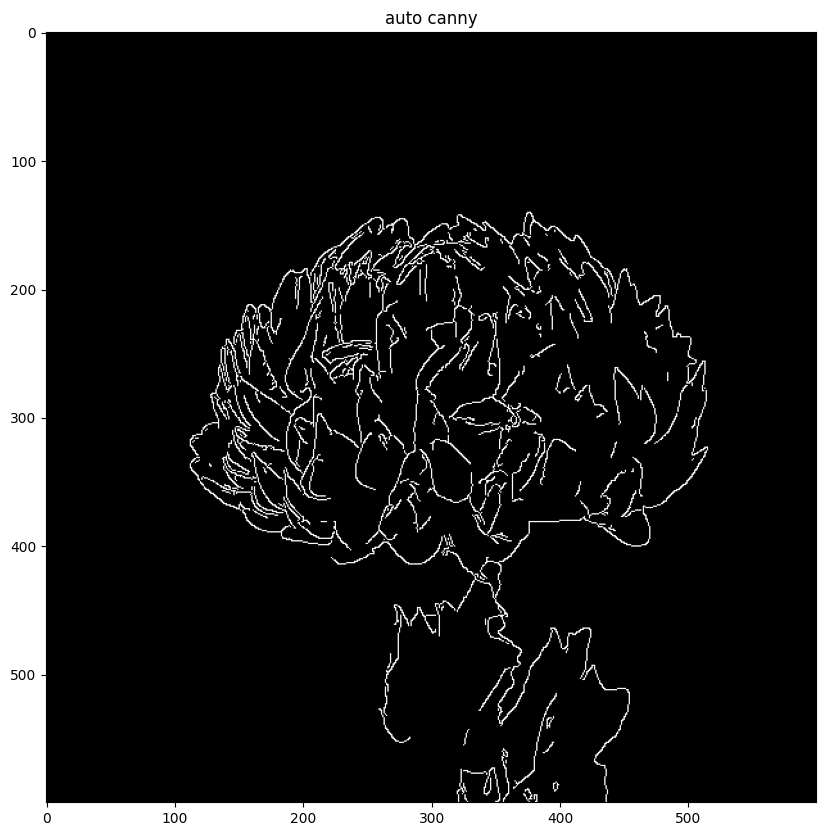

In [8]:
def autoCanny(image):
    # Finds optimal thresholds based on median image pixel intensity
    blurred_img = cv2.blur(image, ksize=(5,5))
    med_val = np.median(image)
    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
    return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)